### Importing necessary packages

In [37]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import time
import seaborn as sns
import numpy as np

### Setting the Fred api environment

In [3]:
fred_key = '8d61ef501bcd381d5cf7318b53296d36'
fred = Fred(api_key = fred_key)

### Creating a copy of dataset

In [4]:
housing_price = fred.search('housing price')
df = housing_price.copy()

##### Segregating the Required Data for Analysis


In [5]:
s_p_housing_price  = df[df['title'].str.contains('S&P')]
all_transaction = df[df['title'].str.contains('All-Transactions')]


### S&P Housing Price Index

Seasonally Adjusted Data are the most common Data Sets used for Meaningful Analysis 

In [7]:
s_p_housing_price = s_p_housing_price.query('seasonal_adjustment == "Seasonally Adjusted" and frequency =="Monthly"  ')
#type1 = type1.drop(labels=['CSUSHPISA','SPCS20RSA'])   droping unrelevent data 
#type1

In [9]:
s_p_housing_price['title'] = s_p_housing_price['title'].str.replace('S&P CoreLogic Case-Shiller ','').str.replace(' Home Price Index','')


In [10]:
housing_price_lst = []
for i in s_p_housing_price.index:
    series_id = s_p_housing_price.loc[i,'id']
    title = s_p_housing_price.loc[i,'title']
    results = fred.get_series(series_id)
    results_final = results.to_frame(name = title)
    housing_price_lst.append(results_final)
    time.sleep(0.1)
    

In [11]:
s_p_housing_data = pd.concat(housing_price_lst,axis = 1)
s_p_housing_data.isnull()
s_p_housing_data = s_p_housing_data.dropna()




### Visual Representation of Housing Price Increase in Top Cities of USA 

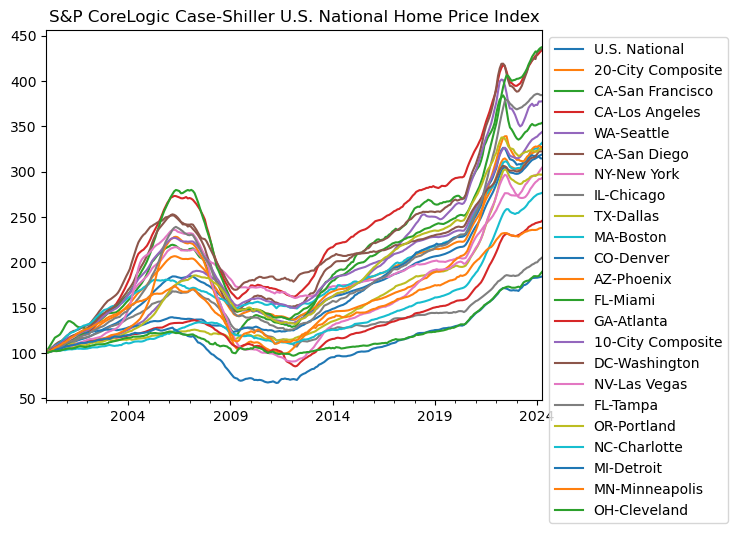

In [12]:
s_p_housing_data.plot(kind = 'line',title = 'S&P CoreLogic Case-Shiller U.S. National Home Price Index')
plt.legend(loc = 'best',bbox_to_anchor = (1.0,1.0))
#plt.legend(fontsize='small') 
plt.savefig('plot1.png', format='png', dpi=100,bbox_inches='tight')

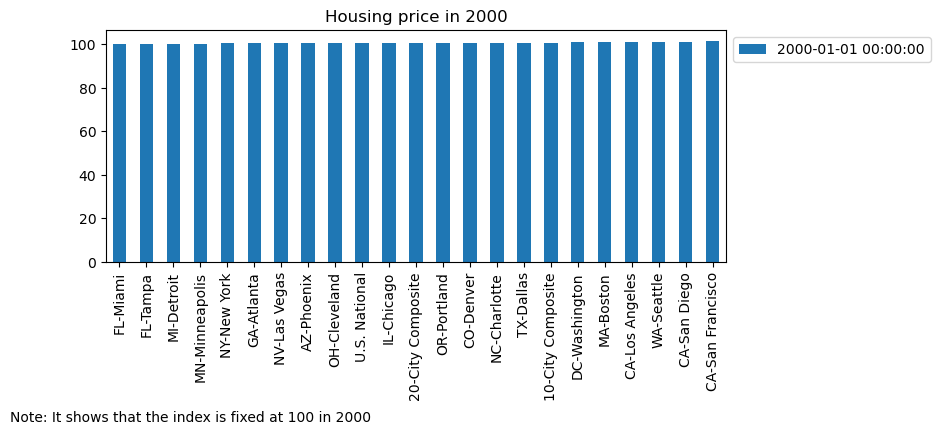

In [13]:
data_2000 = s_p_housing_data.loc[s_p_housing_data.index == '01-01-2000'].T.sort_values("01-01-2000")
data_2000.plot(kind='bar',figsize = (8,4),title = 'Housing price in 2000')
plt.figtext(0.005,-0.1,"Note: It shows that the index is fixed at 100 in 2000")
plt.subplots_adjust(bottom = 0.30)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

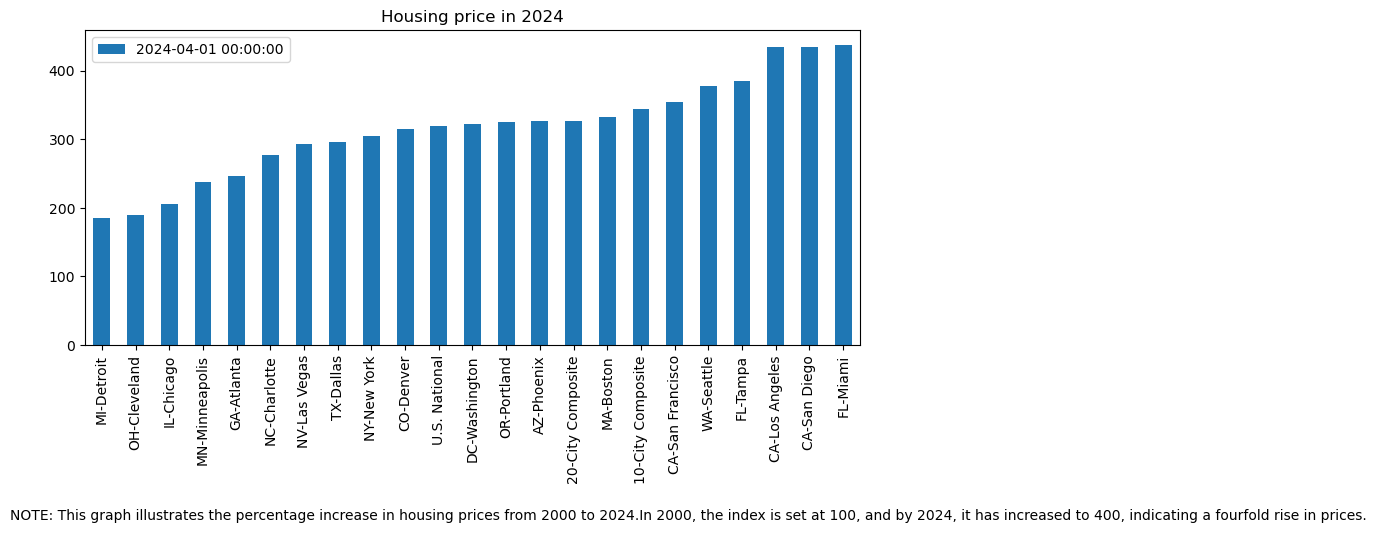

In [14]:
recent_date = s_p_housing_data.tail(1)
recent_date
recent_date.T.sort_values('2024-04-01').plot(kind = 'bar',figsize = (10,5),title = 'Housing price in 2024')
plt.figtext(0.05,-0.1,'NOTE: This graph illustrates the percentage increase in housing prices from 2000 to 2024.In 2000, the index is set at 100, and by 2024, it has increased to 400, indicating a fourfold rise in prices.')
plt.subplots_adjust(bottom = 0.25)
plt.savefig('plot2.png',format = 'png',dpi = 100)

In [15]:
united_states_housing1 = all_transaction.query('title == "All-Transactions House Price Index for the United States"')
united_states_housing1 = fred.get_series(series_id = 'USSTHPI')
united_states_housing1 = united_states_housing1.to_frame(name = 'USA')


#united_states_housing.to_csv(r'D:\2_Praveen\projects\housing\united_states_housing.csv')

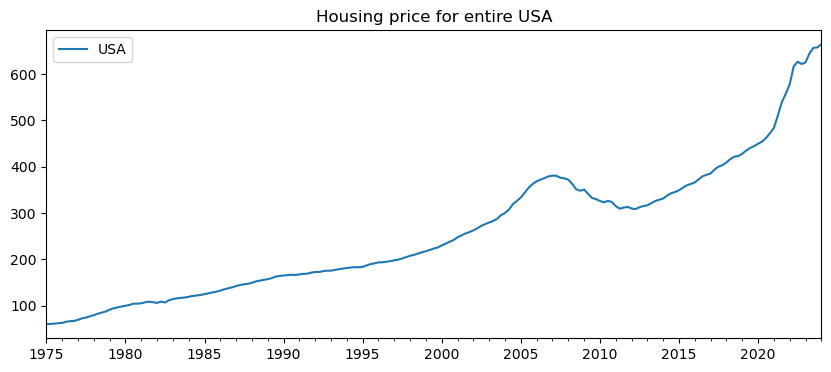

In [16]:
united_states_housing1.plot(title = 'Housing price for entire USA',figsize = (10,4))
#plt.show()
plt.savefig('plot4.png',format = 'png',dpi = 100 )

### Displaying the Relationship Between the Increase in Housing Prices and the Decrease in Housing Sales

In [17]:
housing_sales = fred.search('Housing sales')
housing_sales = housing_sales[housing_sales['title'].str.contains('Existing Home Sales')]
housing_sales['title'].unique()
#fred.get_series(series_id = '')
existing_housing_sales = fred.get_series(series_id = 'EXHOSLUSM495S')
existing_housing_sales = existing_housing_sales.to_frame(name = 'USA')


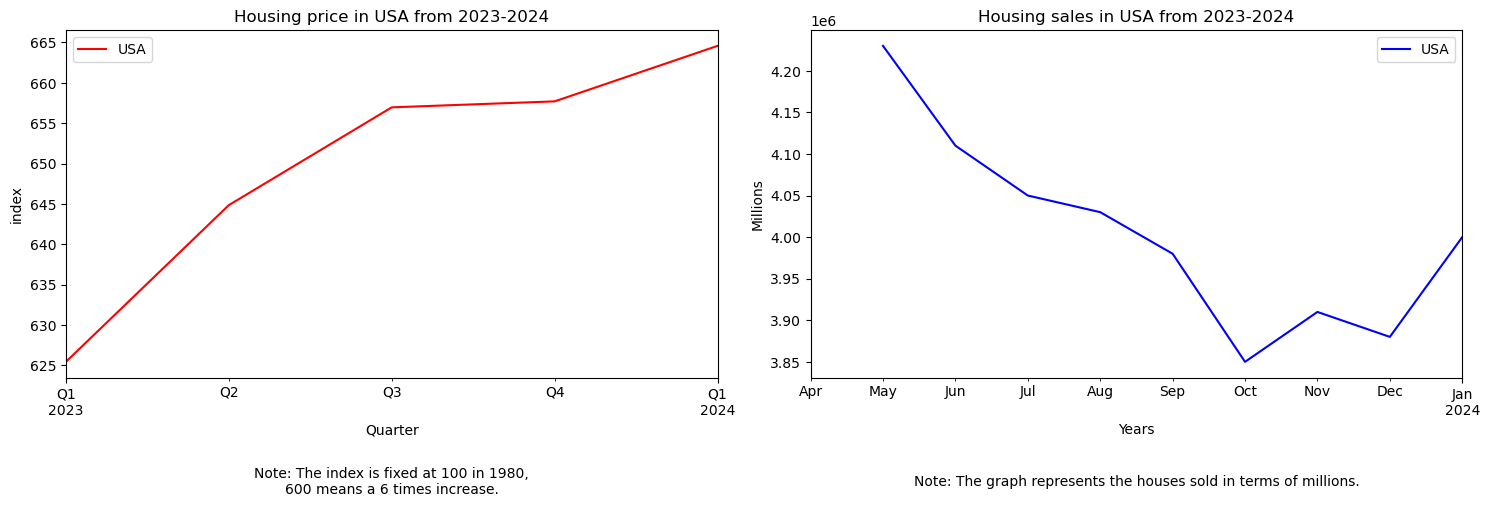

In [36]:
united_states_housing = united_states_housing1.tail(5)
existing_housing_sales = existing_housing_sales.head(10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

united_states_housing.plot(kind='line', ax=axes[0], title='Housing price in USA from 2023-2024', color='r',xlabel = 'Quarter',ylabel = 'index')
axes[0].annotate('Note: The index is fixed at 100 in 1980,\n600 means a 6 times increase.', 
                 xy=(0.5, -0.3), xycoords='axes fraction', ha='center', va='center', fontsize=10, color='black')
existing_housing_sales.plot(kind='line', ax=axes[1], title='Housing sales in USA from 2023-2024', color='b',xlabel = 'Years',ylabel = 'Millions')
axes[1].annotate('Note: The graph represents the houses sold in terms of millions.', xy=(0.5, -0.3), xycoords='axes fraction',
                 ha='center', va='center', fontsize=10, color='black')
plt.savefig('plot5.png',format = 'png',dpi = 100)

plt.subplots_adjust(bottom = 0.30)
plt.tight_layout()

### Major Factors Influencing Housing Price Increases: GDP, Per Capita Income and Interest Rates


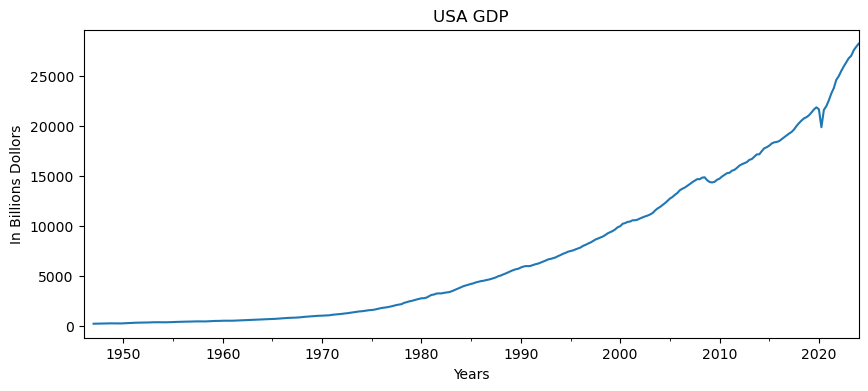

In [19]:
fred.search('GDP USA')
gdp_usa = fred.get_series(series_id = 'GDP')



gdp_usa.plot(title = 'USA GDP',figsize = (10,4),xlabel = "Years",ylabel = 'In Billions Dollors')
plt.show()


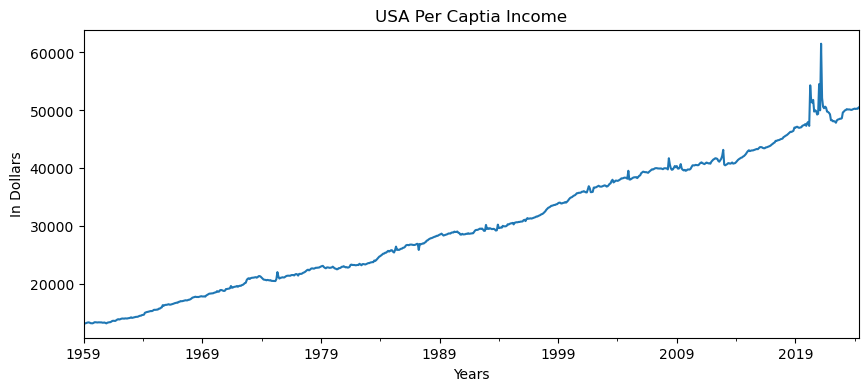

In [20]:
percaptia_usa = fred.search('Real Disposable Personal Income: Per Capita')
percaptia_usa = percaptia_usa.query('seasonal_adjustment == "Seasonally Adjusted Annual Rate"' and 'observation_start == "1959-01-01"')

percaptia_usa = fred.get_series(series_id = 'A229RX0')
percaptia_usa.plot(title = "USA Per Captia Income",figsize = (10,4),xlabel = 'Years',ylabel = 'In Dollars')
plt.show()



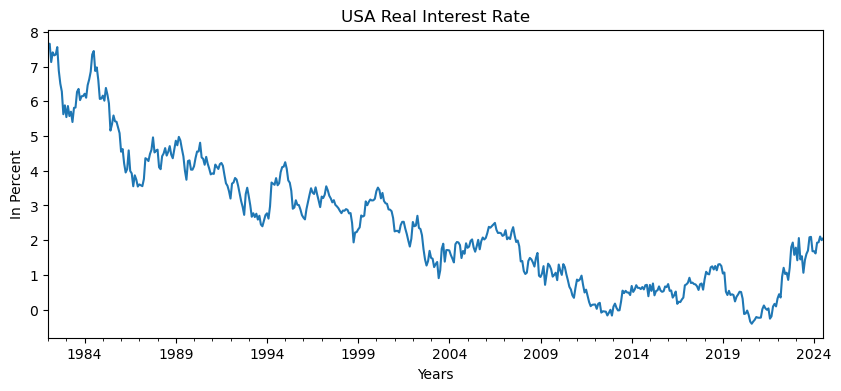

In [21]:
interest_rate_usa = fred.search('Fed interest rate')
#d['title'].unique()
interest_rate_usa = interest_rate_usa.query('title =="10-Year Real Interest Rate"')
#interest_rate_usa
interest_rate_usa = fred.get_series(series_id = 'REAINTRATREARAT10Y')
interest_rate_usa.plot(title ='USA Real Interest Rate',figsize = (10,4),xlabel = 'Years',ylabel = 'In Percent')
plt.show()


#### Housing Price vs GDP

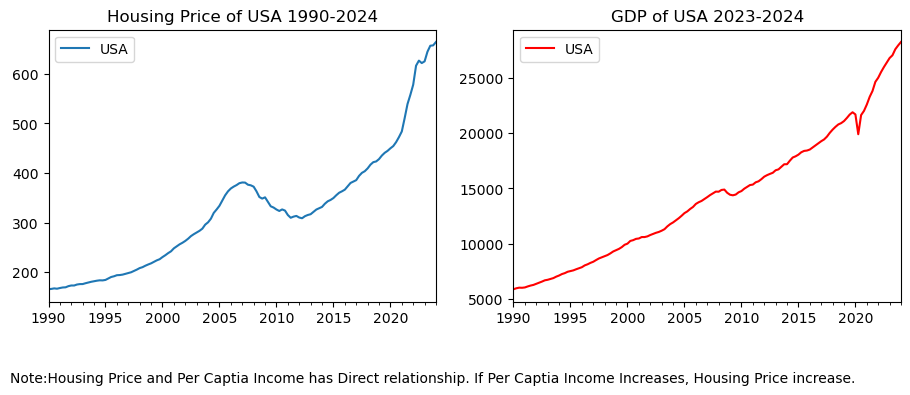

In [30]:
unitedstates_housing = fred.get_series(series_id = 'USSTHPI') # Used to retrieve USA Housing Price Data beyond 2023-2024
fig,axes = plt.subplots(1,2,figsize = (11,4))
unitedstates_housing.to_frame(name = 'USA').iloc[60:197].plot(kind = 'line',ax= axes[0],title = 'Housing Price of USA 1990-2024')
gdp_usa.to_frame(name = 'USA').iloc[176:400].plot(kind = 'line',ax = axes[1],color = 'red',title = 'GDP of USA 2023-2024')
plt.figtext(0.09,-0.001,"Note:Housing Price and Per Captia Income has Direct relationship. If Per Captia Income Increases, Housing Price increase.")
plt.subplots_adjust(bottom = 0.20)
plt.savefig('plot7.png',format = 'png',dpi = 100)

#### Housing Price vs Per Captia Income 

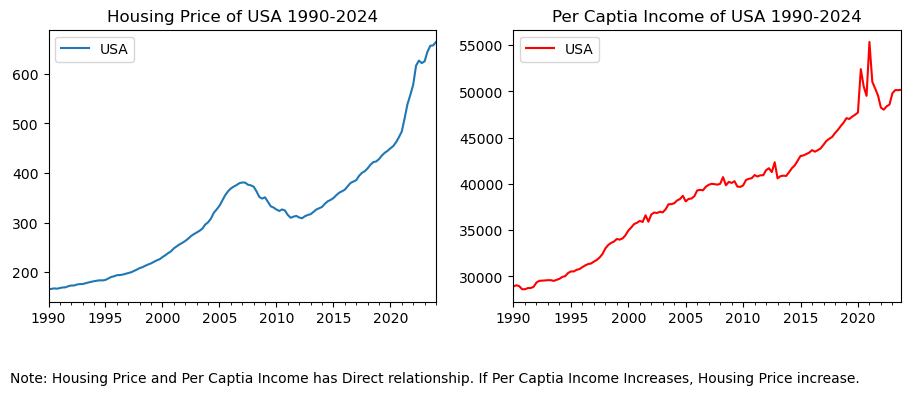

In [31]:
fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (11,4))
unitedstates_housing.to_frame(name = 'USA').iloc[60:197].plot(kind = 'line',ax= axes[0],title = 'Housing Price of USA 1990-2024')
percaptia_usa.to_frame(name = 'USA').iloc[372:780].resample('Q').mean().plot(ax = axes[1],title = 'Per Captia Income of USA 1990-2024',color = 'red')
plt.figtext(0.09,-0.001,"Note: Housing Price and Per Captia Income has Direct relationship. If Per Captia Income Increases, Housing Price increase.")
plt.subplots_adjust(bottom = 0.20)
plt.savefig('plot8.png',format = 'png',dpi = 100)

#### Housing Price vs Real Interest Rate

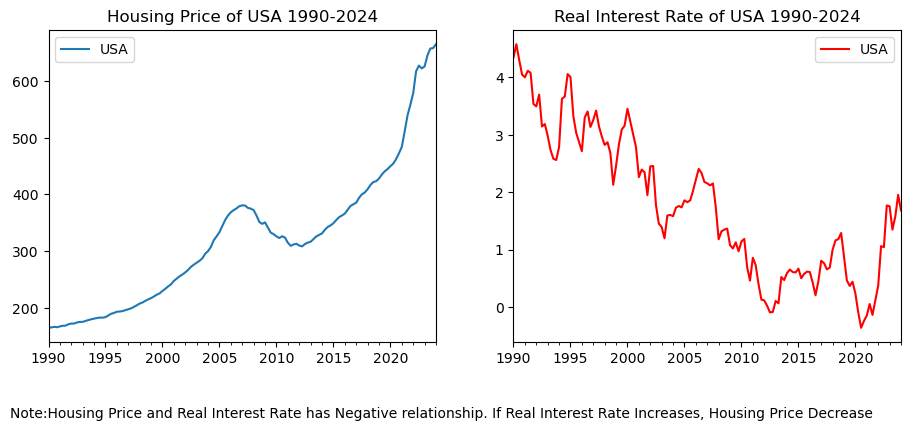

In [32]:
fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (11,4))
#united_states_housing.plot(ax = axes[0],title = "Housing Price of USA 2023-2024")
#interest_rate_usa.to_frame(name = "USA").iloc[492:505].resample('Q').mean().plot(ax = axes[1],title = 'Interest Rate of USA 2023-2024',color = 'Red')
unitedstates_housing = fred.get_series(series_id = 'USSTHPI')
unitedstates_housing.to_frame(name = 'USA').iloc[60:197].plot(kind = 'line',ax= axes[0],title = 'Housing Price of USA 1990-2024')
interest_rate_usa.to_frame(name = "USA").iloc[96:505].resample('Q').mean().plot(ax = axes[1],title = 'Real Interest Rate of USA 1990-2024',color = 'Red')
plt.figtext(0.09,-0.09,"Note:Housing Price and Real Interest Rate has Negative relationship. If Real Interest Rate Increases, Housing Price Decrease")
plt.subplots_adjust(bottom = 0.10)
plt.savefig('plot9.png',format = 'png',dpi = 100)

### Correlation Between GDP, Per Captia Income, Real Interest Rate with Housing Price in USA

In [101]:
housing_price_usa = fred.get_series(series_id = 'USSTHPI')
comparsion_lst = [housing_price_usa,percaptia_usa,interest_rate_usa,gdp_usa]
names_economy =['housing_price_usa','percaptia_usa','interest_rate_usa','gdp_usa'] 
economic_indicator_lst=[]

for (i,x) in zip(comparsion_lst,names_economy):
    economic_indicator = i.to_frame(name = x)
    economic_indicator_lst.append(economic_indicator)
    


In [102]:
economic_indicator_lst[2]
correlation_analysis1 = pd.concat(economic_indicator_lst,axis = 1)
correlation_analysis1.to_csv(r'D:\2_Praveen\projects\housing\correlation_analysis1.csv')

In [104]:
correlation_analysis1 = pd.read_excel(r"D:\2_Praveen\projects\housing\correlation_analysis2.xlsx") ## Done Few Non Major changes in excel for Better Analysis
correlation_analysis1 = correlation_analysis1.set_index('Date')
#correlation_analysis1.info()

In [105]:
quarter_correlated = correlation_analysis1.resample('Q').mean()
correlation_matrix = quarter_correlated.corr()
correlation_matrix


,housing_price_usa,percaptia_usa,interest_rate_usa,gdp_usa
housing_price_usa,1.000000,0.868469,-0.252056,0.927008
percaptia_usa,0.868469,1.000000,-0.553212,0.947672
interest_rate_usa,-0.252056,-0.553212,1.000000,-0.503896
gdp_usa,0.927008,0.947672,-0.503896,1.000000


#### Visualizing Positive Relationship of Housing Price with GDP and Per Capita Income, and Negative Relationship with Real Interest Rate

<Axes: >

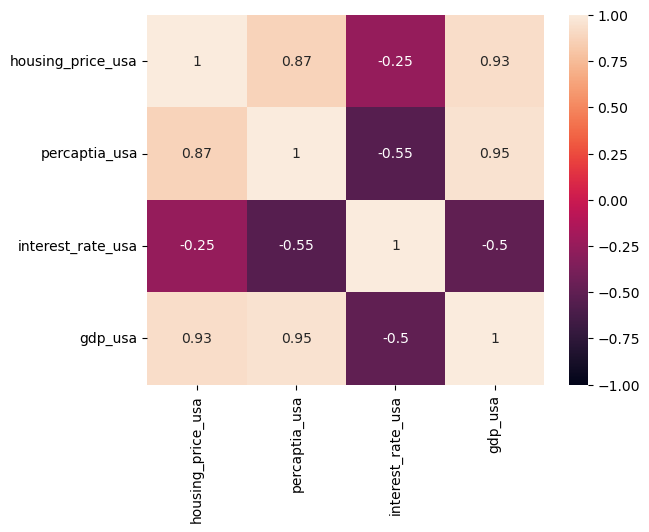

In [106]:
sns.heatmap(correlation_matrix,vmin = -1,vmax = 1,annot = True)

### Saving Every Preprocessed Data Sets Used in our Analysis


In [ ]:
s_p_housing_data.to_csv(r'D:\2_Praveen\projects\housing\s_p_housing_data.csv')

In [ ]:
united_states_housing.to_csv(r'D:\2_Praveen\projects\housing\united_states_housing.csv')

In [ ]:
gdp_usa.to_csv(r'D:\2_Praveen\projects\housing\gdp_usa.csv')

In [ ]:
percaptia_usa.to_csv(r'D:\2_Praveen\projects\housing\percaptia_usa.csv')

In [ ]:
interest_rate_usa.to_csv(r'D:\2_Praveen\projects\housing\interest_rate_usa.csv')